### Leio o dataset

Preferi não dividir em dois arquivos dessa vez

In [26]:
import pandas as pd

df = pd.read_csv("dataset/cars_24_combined.csv")
df.head()

,id,Car Name,Year,Distance,Owners,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


### Vejo informações do dataset

Com isso, consigo saber o tipo das variáveis independentes

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8015 non-null   int64  
 1   Car Name  8014 non-null   object 
 2   Year      8014 non-null   float64
 3   Distance  8015 non-null   int64  
 4   Owners    8015 non-null   int64  
 5   Fuel      8015 non-null   object 
 6   Location  7802 non-null   object 
 7   Drive     8015 non-null   object 
 8   Type      8015 non-null   object 
 9   Price     8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


### Descrevo as variáveis categóricas

In [28]:
df_categoricas = df[["Car Name","Fuel","Location","Drive","Type"]].astype(str)

qtd_unico = df_categoricas.nunique()
valores_unicos = df_categoricas.apply(lambda x: x.unique())

pd.DataFrame({'Quantidade de valores únicos': qtd_unico, 'Valores únicos': valores_unicos})

,Quantidade de valores únicos,Valores únicos
Car Name,127,"[Maruti S PRESSO, Hyundai Xcent, Tata Safari, ..."
Fuel,4,"[PETROL, DIESEL, CNG, LPG]"
Location,437,"[HR-98, TN-22, TS-08, WB-24, HR-51, MH-14, nan..."
Drive,2,"[Manual, Automatic]"
Type,5,"[HatchBack, Sedan, SUV, Lux_SUV, Lux_sedan]"


### Tiro a coluna do Id, Car Name e Location"

In [29]:
df = df.drop(["id","Car Name","Location"], axis=1)

### Faço a One-Hot encoding para variáveis categóricas

In [30]:
df_encoded = pd.get_dummies(df, columns=["Fuel", "Drive", "Type"]) # One-Hot encoding 

df_encoded.drop(["Fuel_LPG"], axis=1, inplace=True) # Das 8k linhas só tem um caso que usa esse combustível

# preencher dados faltantes
df_encoded['Year'].fillna(df_encoded['Year'].median(), inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8015 non-null   float64
 1   Distance         8015 non-null   int64  
 2   Owners           8015 non-null   int64  
 3   Price            8015 non-null   int64  
 4   Fuel_CNG         8015 non-null   bool   
 5   Fuel_DIESEL      8015 non-null   bool   
 6   Fuel_PETROL      8015 non-null   bool   
 7   Drive_Automatic  8015 non-null   bool   
 8   Drive_Manual     8015 non-null   bool   
 9   Type_HatchBack   8015 non-null   bool   
 10  Type_Lux_SUV     8015 non-null   bool   
 11  Type_Lux_sedan   8015 non-null   bool   
 12  Type_SUV         8015 non-null   bool   
 13  Type_Sedan       8015 non-null   bool   
dtypes: bool(10), float64(1), int64(3)
memory usage: 328.9 KB


C:\Users\Nathan\AppData\Local\Temp\ipykernel_19324\3426054305.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Year'].fillna(df_encoded['Year'].median(), inplace=True)


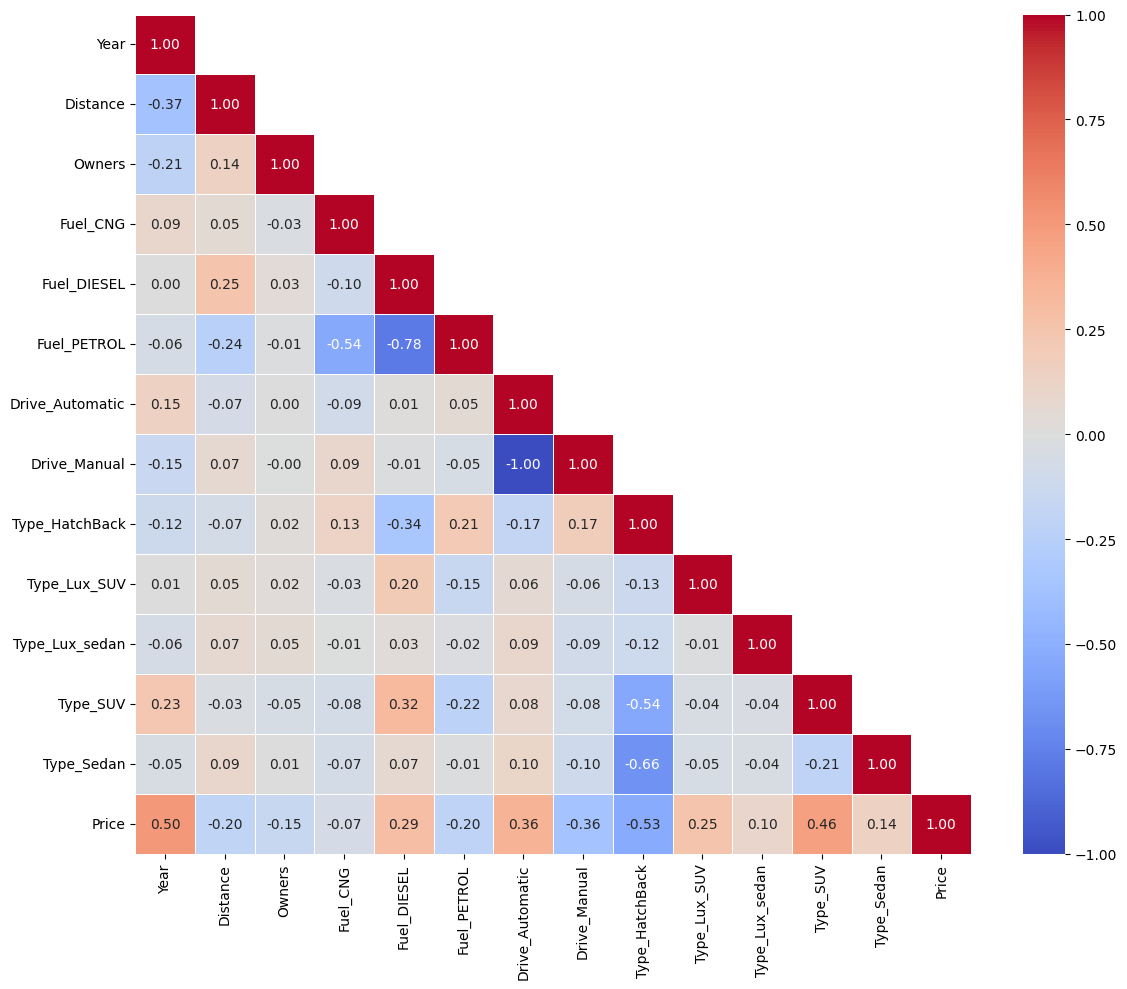

In [ ]:
from correlation import show_pearson_correlation

X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

show_pearson_correlation(X, y)

### Vejo a ocorrência de cada variável categórica

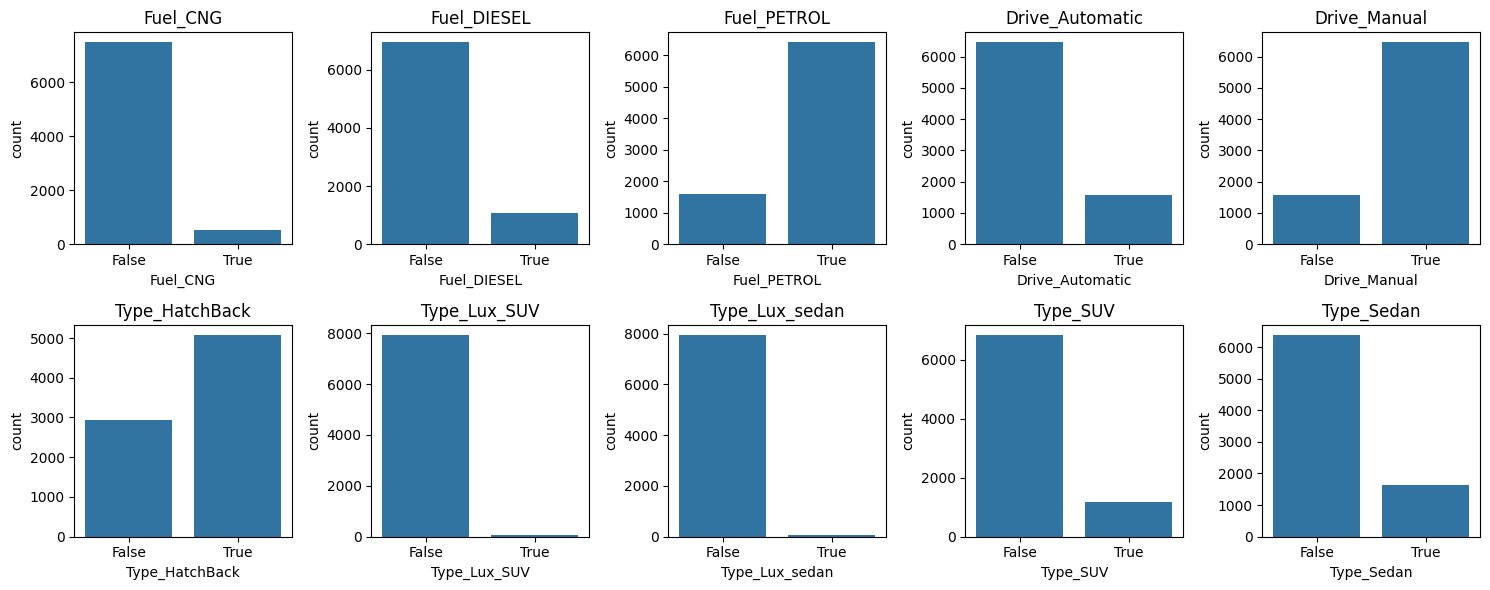

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona colunas com apenas 0 e 1
one_hot_cols = [col for col in df_encoded.columns if sorted(df_encoded[col].dropna().unique()) in [[0], [1], [0,1], [1,0]]]

n_cols = 5
n_rows = (len(one_hot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,6))
axes = axes.flatten()

for i, col in enumerate(one_hot_cols):
    sns.countplot(x=col, data=df_encoded, ax=axes[i])
    axes[i].set_title(col)

# remove subplots extras
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Divido o dataset

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28, shuffle=True)

### Defino o modelo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(
    n_estimators=100,        
    max_depth=20,            
    min_samples_split=10,     
    min_samples_leaf=10,     
    max_features='log2',     
    random_state=28,
    criterion='absolute_error'
)

### Faço validação cruzada

In [71]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=28)

scores = cross_val_score(
    modelo_rf, X_train, y_train, 
    cv=kf, scoring='r2', n_jobs=-1
)

print("R² por fold:", scores)
print("R² médio:", np.mean(scores))


R² por fold: [0.64762072 0.65201731 0.65760785 0.62805754 0.6245752 ]
R² médio: 0.6419757244411104
